SVM are used for

1. Linear or Non Linear Classification
2. Regression
3. Outlier detection

Note: SVM's are sensitive to feature scale

# Linear SVM Classification

Note:

SVM hyperparameter

C - low C More space between the support vectors and viceversa

In [1]:
import numpy as np
from numpy.core import multiarray
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [2]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = (iris['target']==2).astype(np.float64)


In [3]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [4]:
svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge')),
])

In [5]:
svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [6]:
svm_clf.predict([[1.4,0.2]])

array([0.])

In [7]:
svm_clf.predict([[5.5,1.5]])

array([1.])

Note:
    
    Other alternatives instead of LinearSVC
    LinearSVC(loss='hinge', C=1)
    SVC(kernel='linear', C=1)
    SGDClassifier(loss='hinge', alpha=1/(m*C))

# Non Linear SVM Classification

In [8]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

In [9]:
X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge'))
])

In [10]:
polynomial_svm_clf.fit(X,y)

C:\ProgramData\Anaconda3\envs\deeplearning\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

# Polynomial Kernel

In [11]:
from sklearn.svm import SVC
poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5))
])

In [12]:
poly_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=1, kernel='poly'))])

# Similarity Features

Add features which measure how much each instance resembles a particular landmark

Similarity finction can be Gausian Radial Basis Function(RBF)



# Gausian RBF Kernel

In [13]:
guasian_rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001))
]) 

In [14]:
guasian_rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

# SVM Regression

Reverse the objective of SVM Classification i.e instead of trying to fit the largest possible street between the two classes for avoiding margin violations in SVM regression fit as manu instances possible on the street while limiting the margim viaolations

this width is controlled by hyperparameter epsilon

In [15]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5)
svm_reg.fit(X,y)

LinearSVR(epsilon=1.5)

# SVM Regressiong Non Linear

In [16]:
from sklearn.svm import SVR

svm_reg = SVR(kernel='poly',degree=2, C=100,epsilon=0.1)
svm_reg.fit(X,y)

SVR(C=100, degree=2, kernel='poly')

# SVM for outlier detection

In [17]:
import pandas as pd
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
import numpy as np

In [36]:
iris = datasets.load_iris()
X = iris['data'][:,(0,1)]


In [43]:
model = OneClassSVM(kernel = 'rbf', gamma = 0.001, nu = 0.03).fit(X)
# nu-what % of data to be classified as outlier

In [38]:
y_pred = model.predict(X)
y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [39]:
# filter outlier index
outlier_index = np.where(y_pred == -1) 
# filter outlier values
outlier_values = X[outlier_index]
outlier_values

array([[4.3, 3. ],
       [4.5, 2.3],
       [7.7, 3.8],
       [7.7, 2.6],
       [7.9, 3.8]])

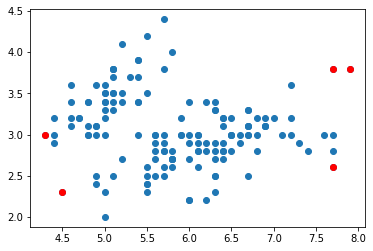

In [42]:
# visualize outputs
plt.scatter(X[:,(0,)], X[:,(1,)])
plt.scatter(outlier_values[:,(0,)], outlier_values[:,(1,)], c = "r")